In [19]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ranksums, ttest_rel, wilcoxon
from IPython.display import display
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [20]:
# This folder is generated after running evaluate_test_set.py in the 'evaluation' folder of the project
TEST_PATH = Path('/home/suraj/Workspace/results/NKI/media_results/test_analysis').resolve()

In [23]:

# Metrics to evaluate statistical significance on
METRICS = ['mae', 'mse', 'psnr', 'ssim', 'nmse']

In [24]:
def compute_statistical_significance(path, pairs, metrics):
    """
    path: Path to test data with different folders for each model. Each model folder has a "patient_metrics.csv" file 
    computed from projects/nki_cervix_cbct_ct/evaluation/evaluate_test_set.py
    
    pairs: List of lists consisting of pairs of models to compare statistically
    
    metrics: Metrics of interest to perform statistical significance tests on
    """
    for idx, pair in enumerate(pairs):
        df = pd.DataFrame()

        if pair[0] == "original":
            model_folders = [['original', path / pair[1]], ['translated', path / pair[1]]]
            metric_paths = [folder[1] / "patient_metrics.csv" for folder in model_folders]
            model_folders[0] = ['original', path / "original"]

        else:
            model_folders = [('translated', path / pair[idx]) for idx in range(len(pair))]
            metric_paths = [folder[1] / "patient_metrics.csv" for folder in model_folders]

        metrics_df = [pd.read_csv(metric_path) for metric_path in metric_paths]

        for metric in metrics:
            metric_df = pd.DataFrame()

            for model_idx, model_folder in enumerate(model_folders):
                metric_df[model_folder[1].stem] = metrics_df[model_idx][f"{model_folder[0]}_{metric}"]
            
            stat_test = wilcoxon(*[metric_df[folder[1].stem] for folder in model_folders])
            normal_stat_test = ttest_rel(*[metric_df[folder[1].stem] for folder in model_folders])

            df[metric] = [metric_df[folder[1].stem].mean() for folder in model_folders] + [stat_test.pvalue, normal_stat_test.pvalue]

            metric_df.plot.kde()
            plt.title(metric)
            plt.show()

        df = df.transpose()            
        df.columns = [*pair, 'p', 'normal_p']

        display(df.round(4))


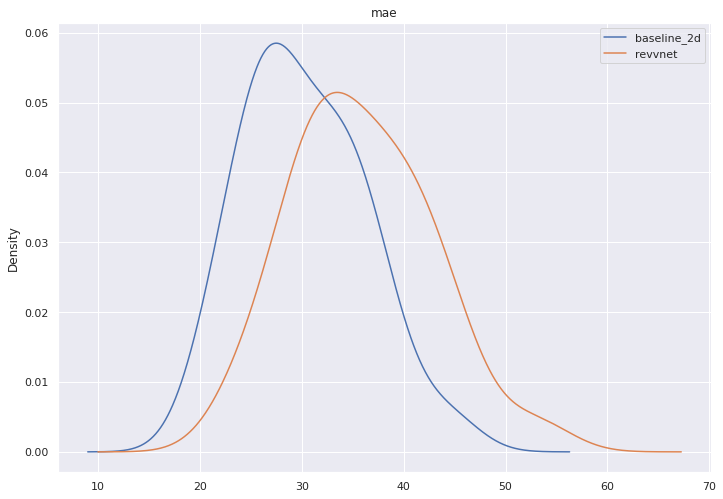

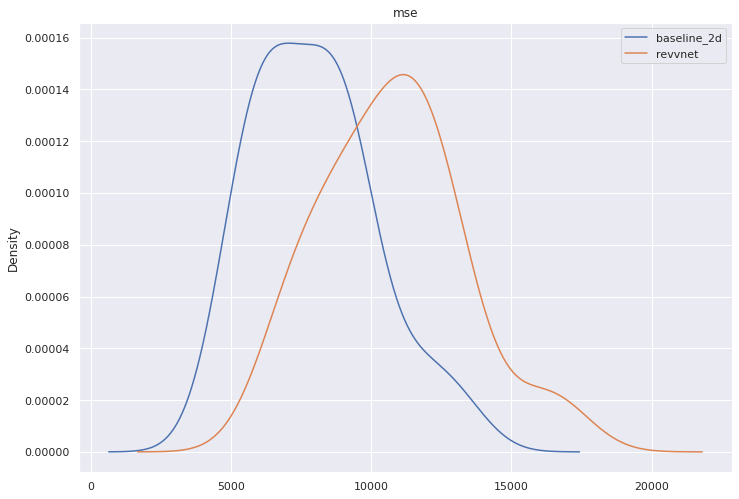

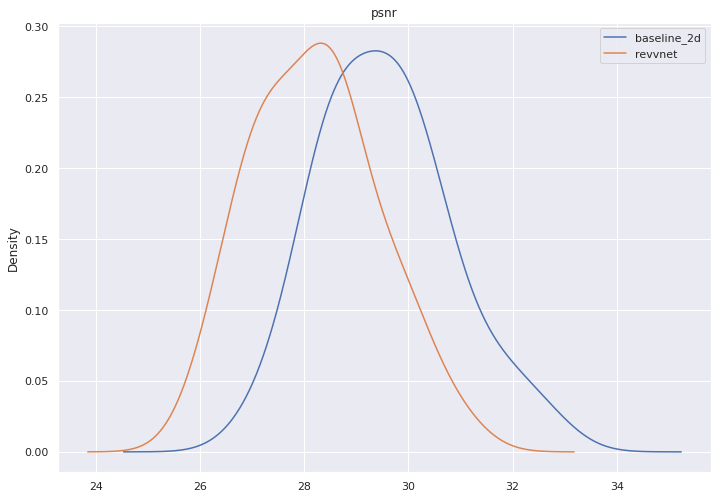

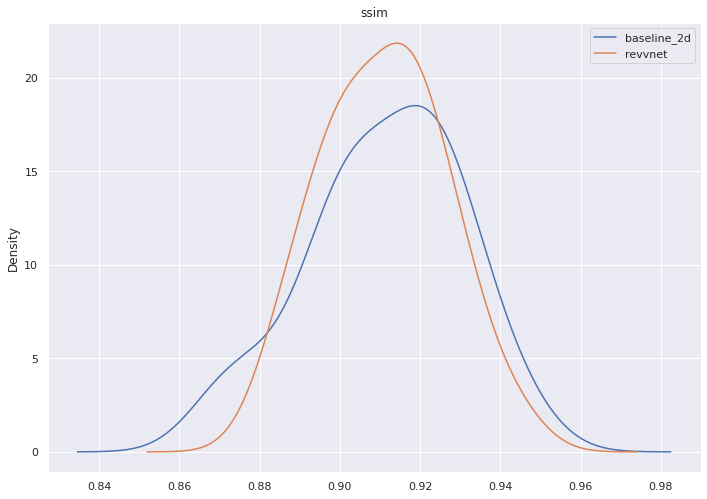

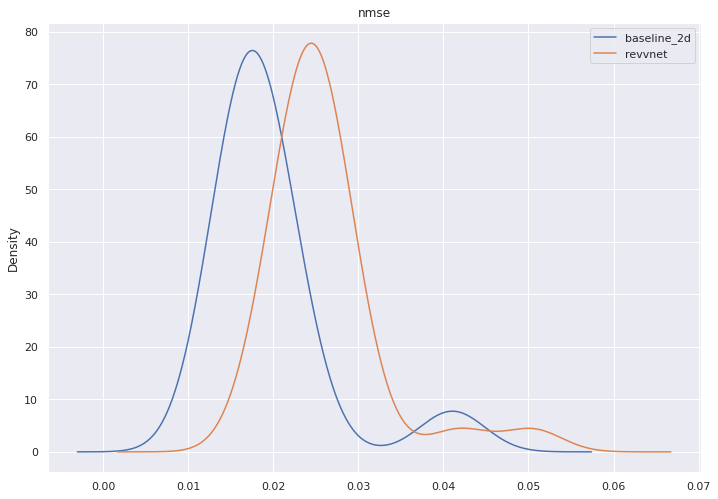

,baseline_2d,revvnet,p,normal_p
mae,30.2270,35.8637,0.0000,0.0000
mse,7951.8541,10749.1106,0.0000,0.0000
psnr,29.5450,28.2021,0.0000,0.0000
ssim,0.9112,0.9109,0.1075,0.7614
nmse,0.0195,0.0260,0.0000,0.0000


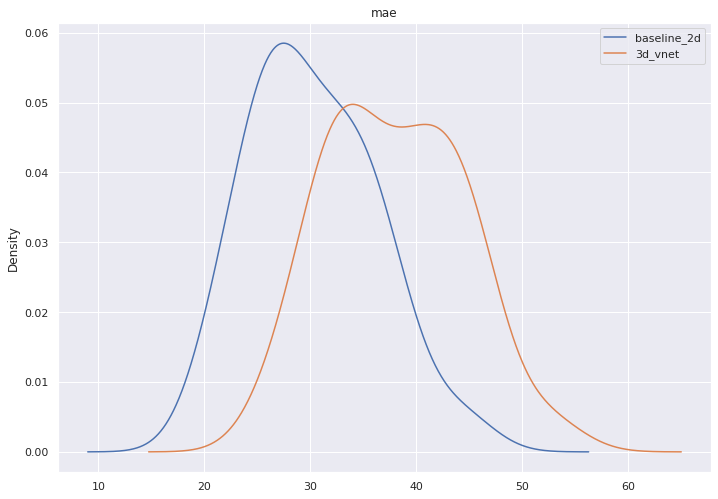

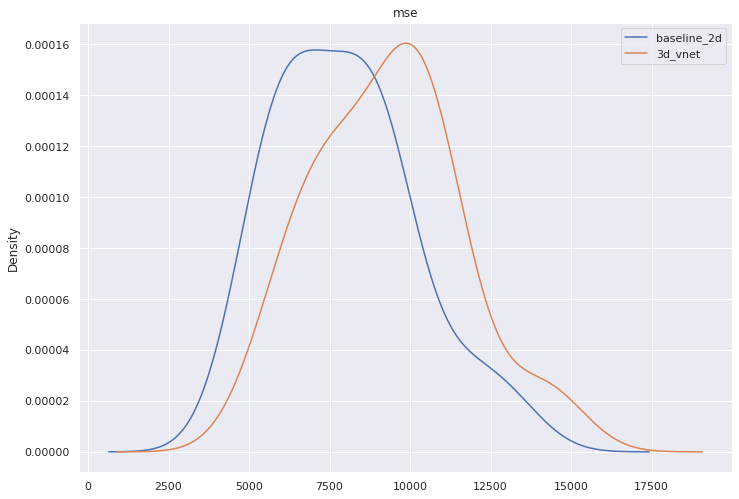

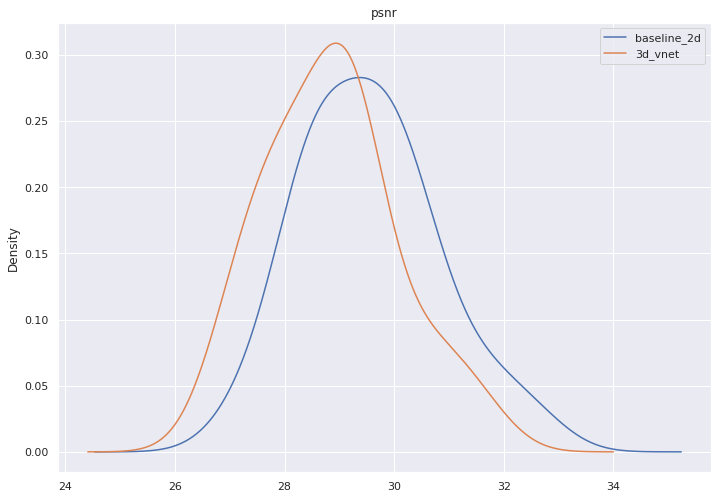

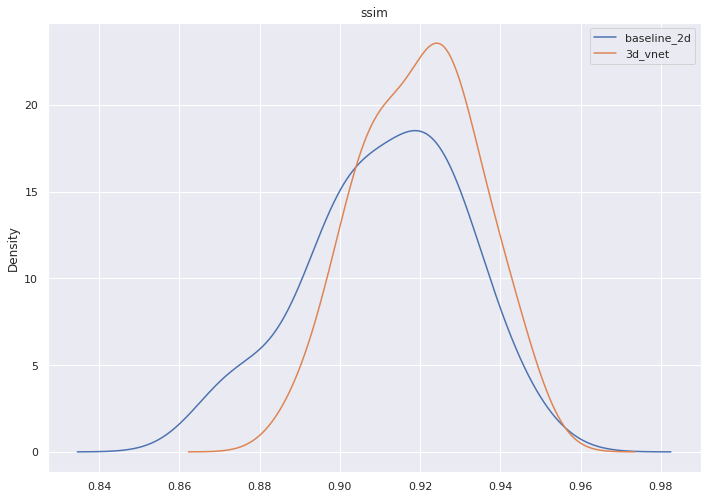

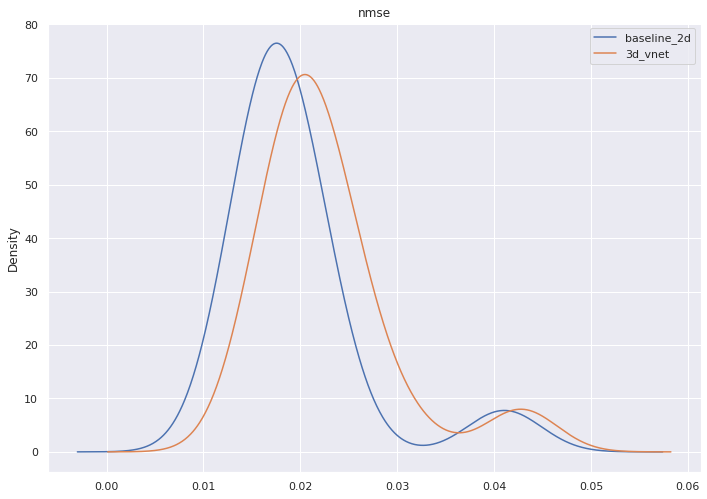

,baseline_2d,3d_vnet,p,normal_p
mae,30.2270,37.9705,0.0,0.0
mse,7951.8541,9299.9455,0.0,0.0
psnr,29.5450,28.8421,0.0,0.0
ssim,0.9112,0.9198,0.0,0.0
nmse,0.0195,0.0227,0.0,0.0


In [25]:
# Original vs 2D vs 3D comparisons
# Pairs to be compared for statistical significance tests
PAIRS = [["baseline_2d", "revvnet"],
                ["baseline_2d", "3d_vnet"]]

compute_statistical_significance(TEST_PATH,PAIRS, METRICS)

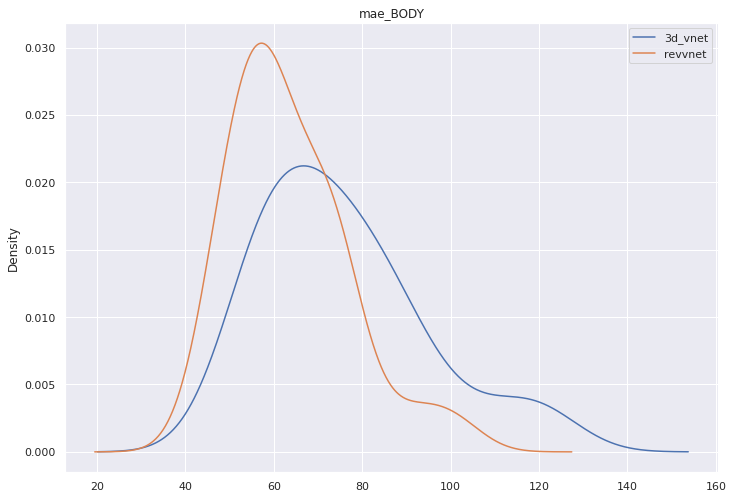

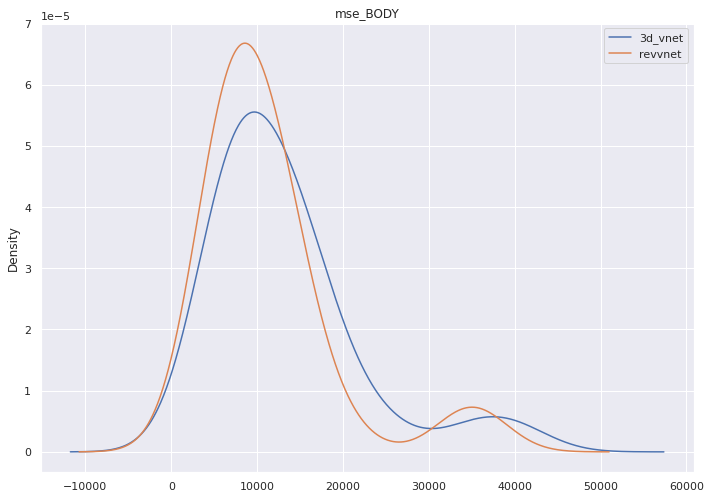

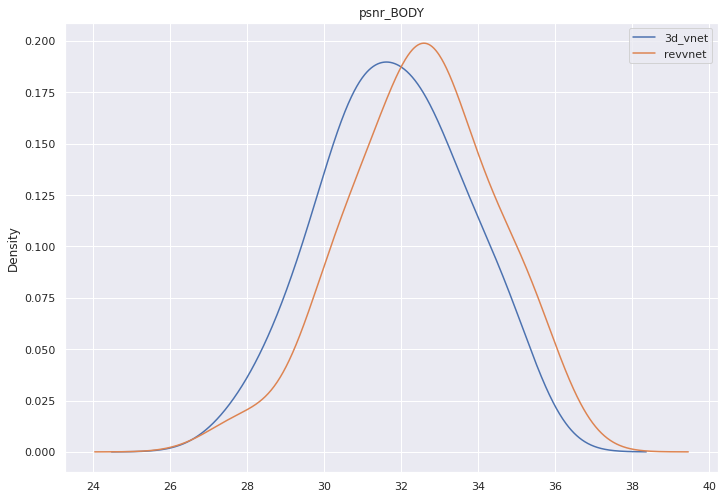

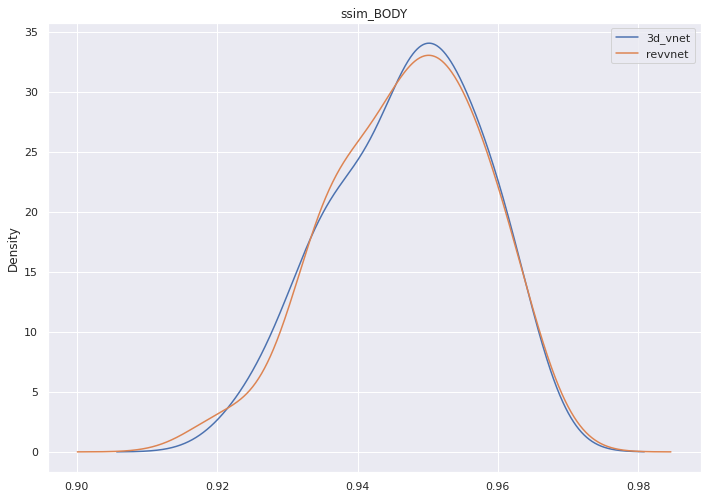

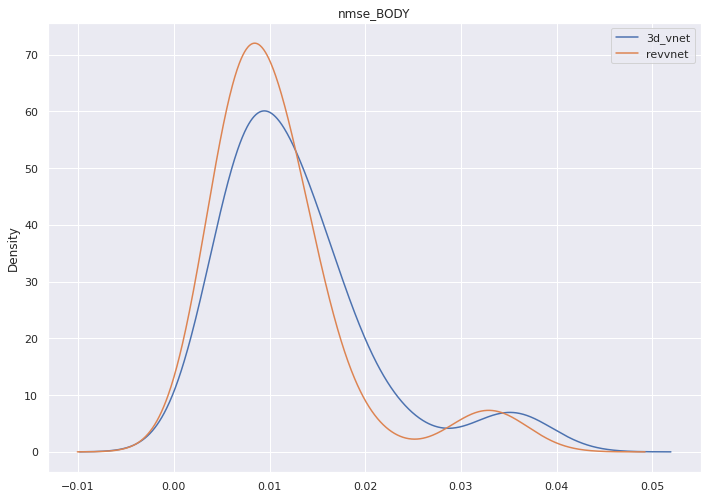

,3d_vnet,revvnet,p,normal_p
mae_BODY,75.6856,63.5468,0.0000,0.0000
mse_BODY,13198.8933,11282.7336,0.0000,0.0001
psnr_BODY,31.7931,32.4788,0.0000,0.0000
ssim_BODY,0.9470,0.9470,0.7548,0.8471
nmse_BODY,0.0129,0.0110,0.0000,0.0001


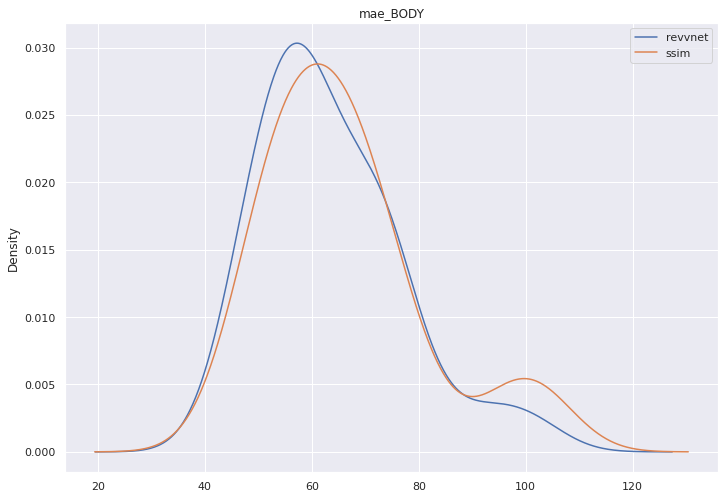

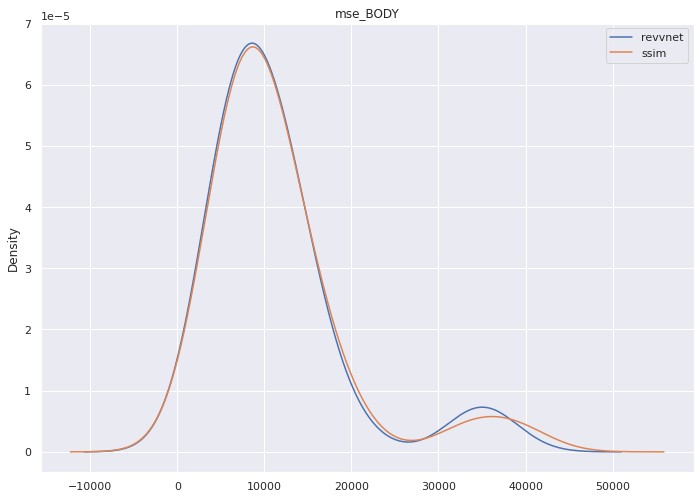

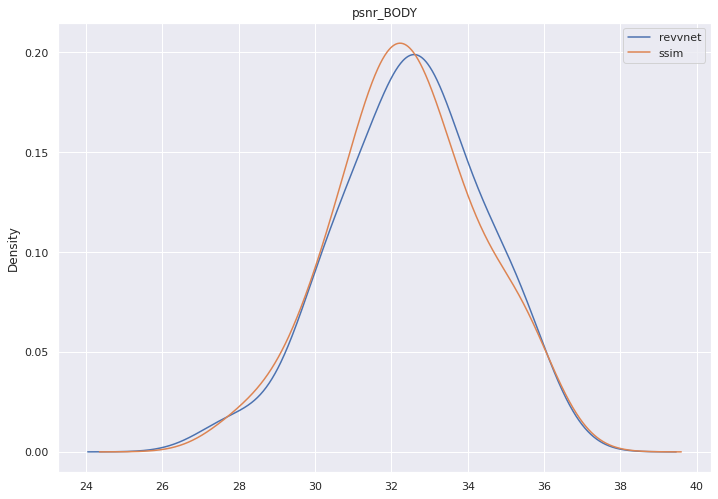

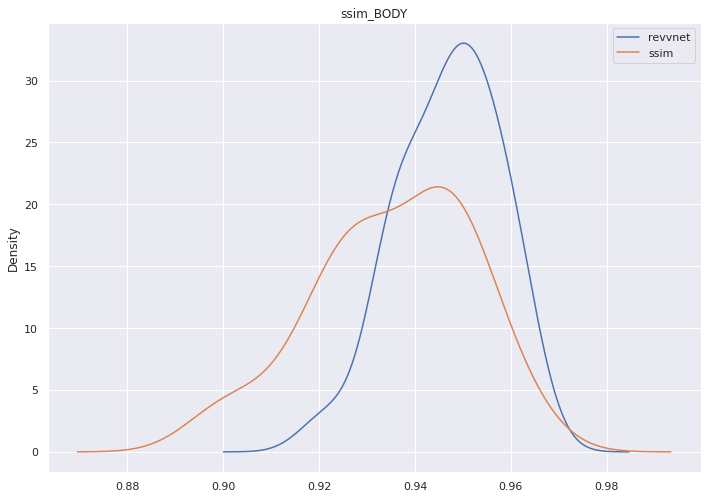

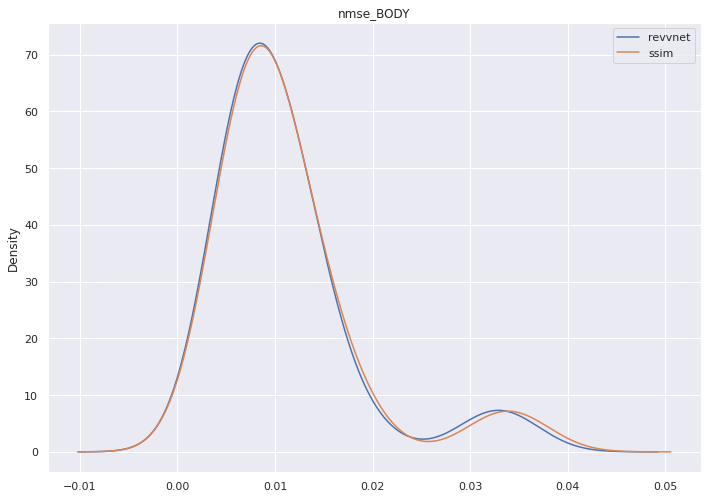

,revvnet,ssim,p,normal_p
mae_BODY,63.5468,66.0882,0.0023,0.0049
mse_BODY,11282.7336,11515.6328,0.3613,0.3983
psnr_BODY,32.4788,32.3873,0.1785,0.2419
ssim_BODY,0.9470,0.9355,0.0000,0.0000
nmse_BODY,0.0110,0.0112,0.3613,0.3994


In [6]:
# 3D vs Reversible vs SSIM
# Pairs to be compared for statistical significance tests
PAIRS = [["3d_vnet", "revvnet"],
                ["revvnet", "ssim"]]
METRICS = ['mae_BODY', 'mse_BODY', 'psnr_BODY', 'ssim_BODY', 'nmse_BODY']
compute_statistical_significance(TEST_PATH,PAIRS, METRICS)

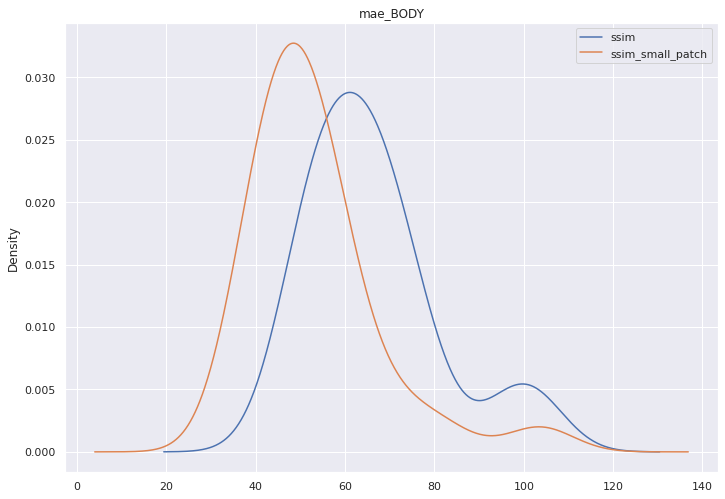

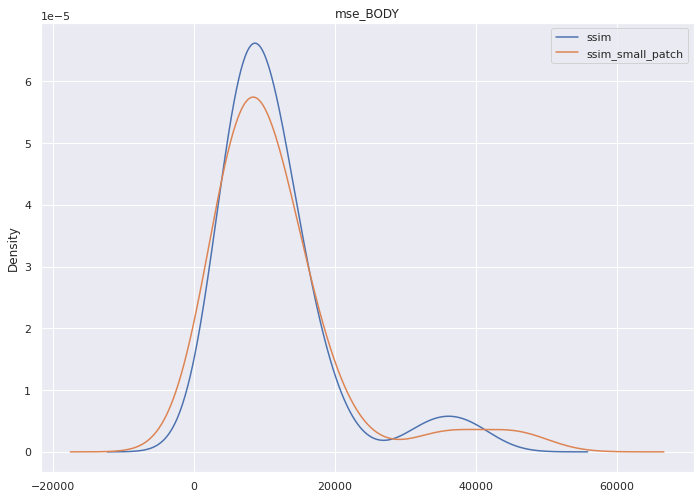

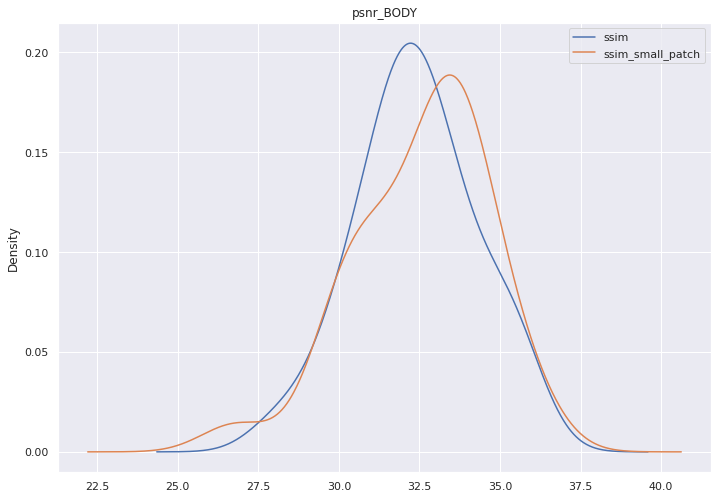

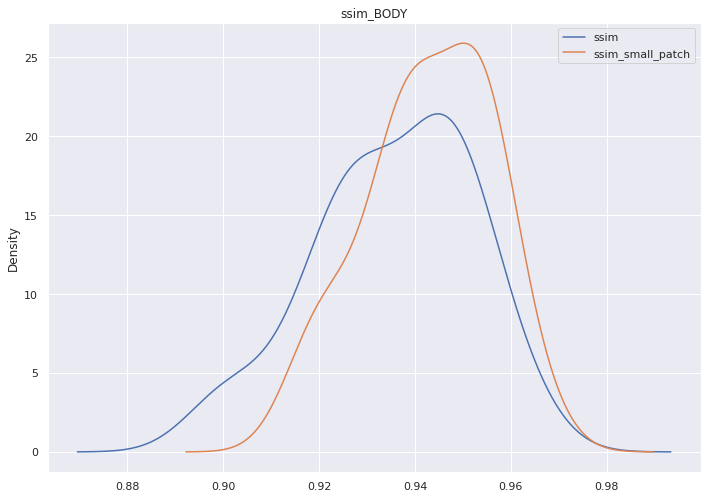

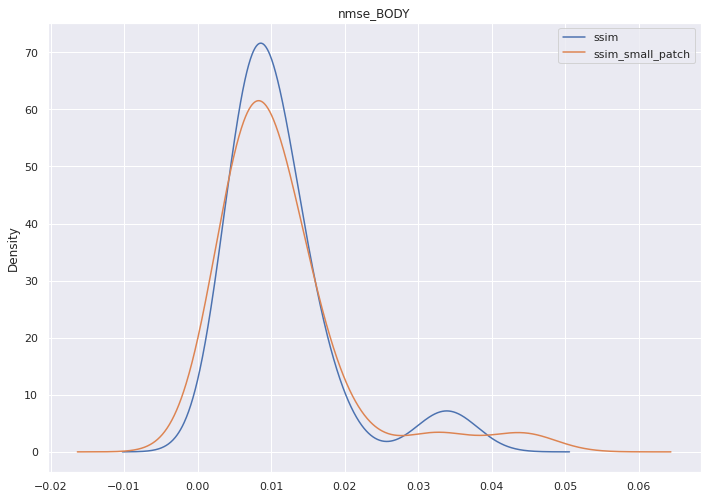

,ssim,ssim_small_patch,p,normal_p
mae_BODY,66.0882,52.9736,0.0000,0.0000
mse_BODY,11515.6328,11645.1037,0.5481,0.8173
psnr_BODY,32.3873,32.5545,0.3613,0.2660
ssim_BODY,0.9355,0.9429,0.0000,0.0000
nmse_BODY,0.0112,0.0113,0.5481,0.8564


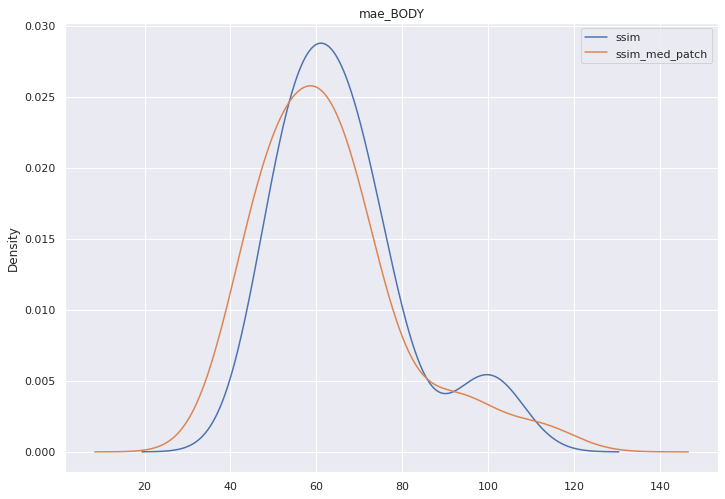

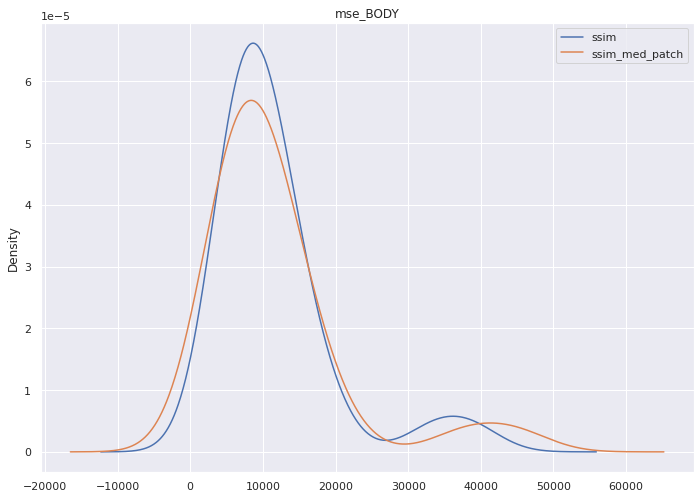

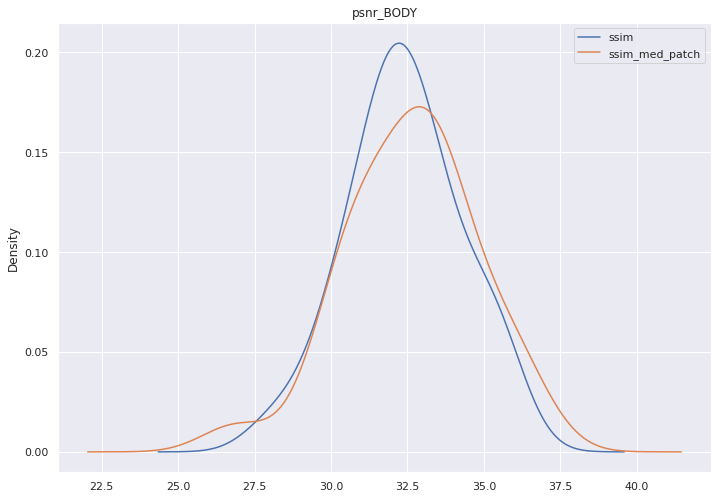

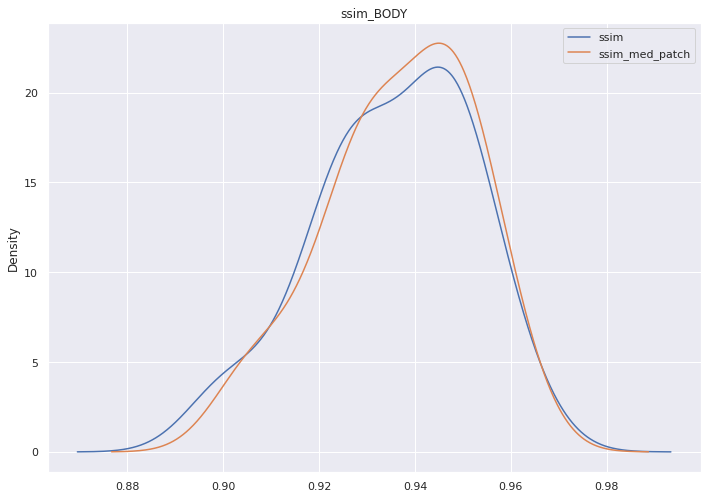

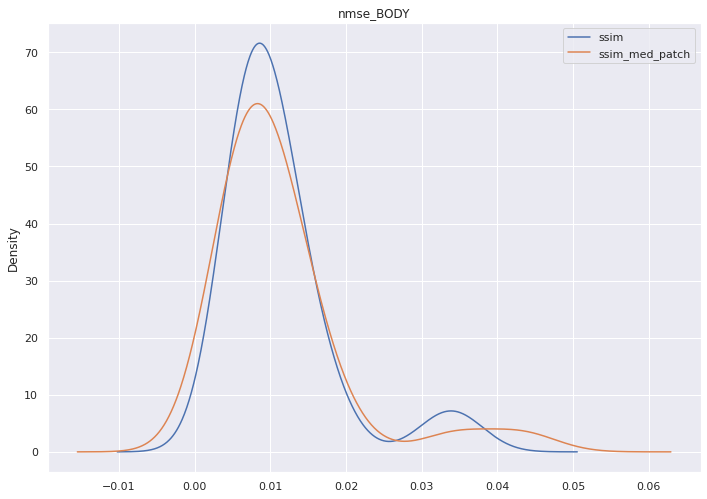

,ssim,ssim_med_patch,p,normal_p
mae_BODY,66.0882,62.9131,0.0010,0.0007
mse_BODY,11515.6328,11590.8852,0.0837,0.8713
psnr_BODY,32.3873,32.5982,0.0388,0.0502
ssim_BODY,0.9355,0.9368,0.0012,0.0005
nmse_BODY,0.0112,0.0113,0.0837,0.9258


In [7]:
# Different patch sizes for 3D + Reversible + SSIM
# Pairs to be compared for statistical significance tests
PAIRS = [["ssim", "ssim_small_patch"],
                ["ssim", "ssim_med_patch"]]
compute_statistical_significance(TEST_PATH,PAIRS, METRICS)